In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import networkx as nx
from collections import Counter

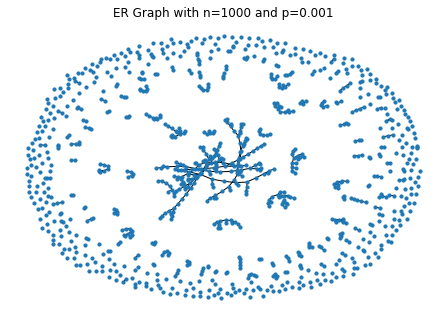

In [3]:
ER_001 = nx.generators.random_graphs.gnp_random_graph(1000,0.001,seed=None,directed=False)
nx.draw(ER_001,with_labels = False, node_size=10)
plt.title("ER Graph with n=1000 and p=0.001")
plt.show()

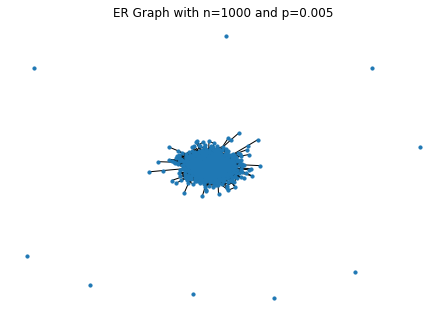

In [4]:
ER_005 = nx.generators.random_graphs.gnp_random_graph(1000,0.005,seed=None,directed=False)
nx.draw(ER_005, with_labels = False, node_size=10)
plt.title("ER Graph with n=1000 and p=0.005")


plt.show()

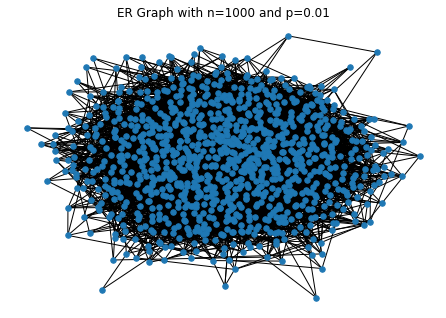

In [5]:
ER_01 = nx.generators.random_graphs.gnp_random_graph(1000,0.01,seed=None,directed=False)
nx.draw(ER_01,with_labels = False, node_size=30)
plt.title("ER Graph with n=1000 and p=0.01")


plt.show()

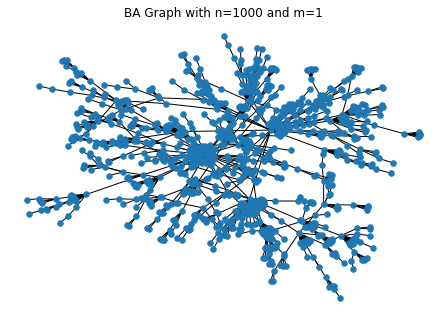

In [6]:
g1 = nx.generators.random_graphs.barabasi_albert_graph(1000, 1, seed=None)
nx.draw(g1,with_labels = False, node_size=30)
plt.title("BA Graph with n=1000 and m=1")


plt.show()

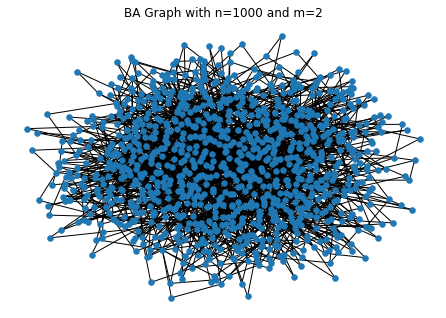

In [7]:
g2 = nx.generators.random_graphs.barabasi_albert_graph(1000, 2, seed=None)
nx.draw(g2, with_labels = False, node_size=30)
plt.title("BA Graph with n=1000 and m=2")


plt.show()

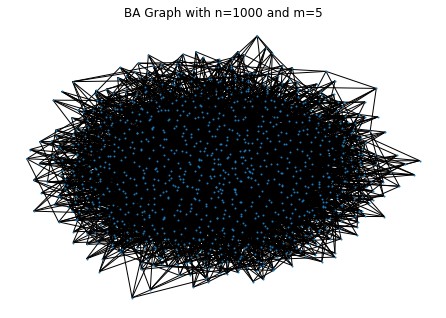

In [8]:
g5 = nx.generators.random_graphs.barabasi_albert_graph(1000, 5, seed=None)
nx.draw(g5,with_labels = False, node_size=1)
plt.title("BA Graph with n=1000 and m=5")


plt.show()

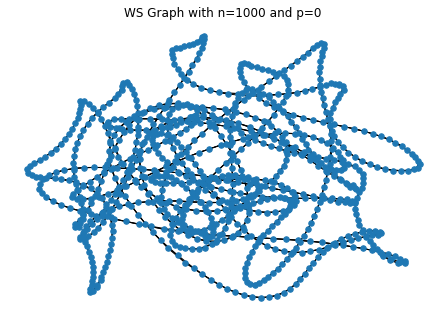

In [9]:
graph_ws_0 = nx.generators.random_graphs.watts_strogatz_graph(1000, 4, 0, seed=None)
nx.draw(graph_ws_0,with_labels = False, node_size=30)
plt.title("WS Graph with n=1000 and p=0")

plt.show()

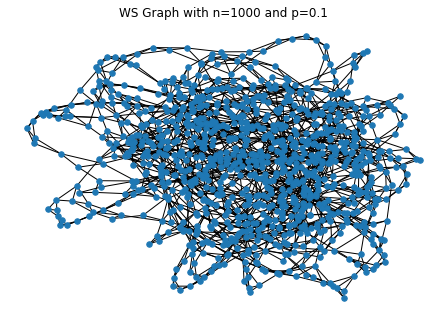

In [10]:
graph_ws_01 = nx.generators.random_graphs.watts_strogatz_graph(1000, 4, 0.1, seed=None)
nx.draw(graph_ws_01, with_labels = False, node_size=30)
plt.title("WS Graph with n=1000 and p=0.1")


plt.show()

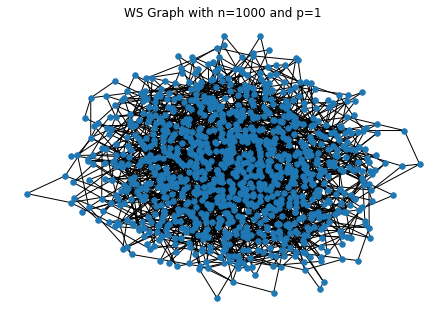

In [11]:
graph_ws_1 = nx.generators.random_graphs.watts_strogatz_graph(1000, 4,1, seed=None)
nx.draw(graph_ws_1,with_labels = False, node_size=30)
plt.title("WS Graph with n=1000 and p=1")


plt.show()

## plot the degree distribution

In [12]:
# import data
D = nx.read_edgelist("CollegeMsg.txt", nodetype=int, data=(("time", int),),create_using=nx.Graph())

In [13]:
# create function
def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(list(counter_dict.keys()))))

    bins = np.logspace(min_x,max_base,num=bin_count)

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
    bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])

    return bin_means_x,bin_means_y


<ipython-input-13-354aba6b7042>:16: RuntimeWarning: invalid value encountered in true_divide
  bin_means_y = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])
<ipython-input-13-354aba6b7042>:17: RuntimeWarning: invalid value encountered in true_divide
  bin_means_x = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])


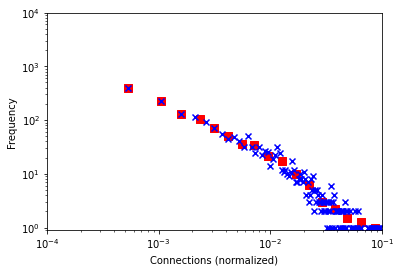

In [14]:
# Plot degree distribution
import networkx as nx
ba_c = nx.degree_centrality(D)
# To convert normalized degrees to raw degrees
#ba_c = {k:int(v*(len(ba_g)-1)) for k,v in ba_c.iteritems()}
ba_c2 = dict(Counter(ba_c.values()))

ba_x,ba_y = log_binning(ba_c2,50)

plt.xscale('log')
plt.yscale('log')
plt.scatter(ba_x,ba_y,c='r',marker='s',s=50)
plt.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')
plt.xlim((1e-4,1e-1))
plt.ylim((.9,1e4))
plt.xlabel('Connections (normalized)')
plt.ylabel('Frequency')
plt.show()

In [15]:
    # Calculate the largest components
largest_cc = max(nx.connected_components(D), key=len)

    # Calculate the components
num_cc = [len(c) for c in nx.connected_components(D)]

    # The number of components
num_cc

[1893, 2, 2, 2]

In [16]:
# Percentage of the nodes are in the largest component
pct=len(largest_cc)/sum(num_cc)
pct

0.9968404423380727

In [17]:
ld=nx.path_graph(largest_cc)
nx.average_shortest_path_length(ld)

631.3333333333334